In [27]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

#Data cleaning part


1.   Remove Html Tages
2.   Remove special chracters
3.   converting every thing to lower case
4.   Removing stop words
5.   Stemming



In [ ]:
df=pd.read_csv('IMDB Dataset.csv')

In [ ]:
df.shape

(50000, 2)

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [ ]:
df['sentiment'].replace({'positive':1,'negative':0},inplace=True)
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [ ]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

#1.Define a function to cleaning html code

In [ ]:
import re

In [ ]:
def clean_html_code(text) :
  clean  = re.compile('<.*?>')
  return re.sub(clean,'',text)

In [ ]:
#Example of How it work
x=clean_html_code('what happened with me.<br /><br />The first')
print(x)

what happened with me.The first


In [ ]:
df['review']=df['review'].apply(clean_html_code)

In [ ]:
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.I would say the main appeal of the show is due to the fact that it goes where other shows wo

#2.Removing Special Character

In [ ]:
def remove_special_ch(text) :
  x=''
  for i in text :
    if i.isalnum():
      x=x+i
    else:
      x=x+' '
  return x

In [ ]:
#Example of remove special character
x=remove_special_ch(', Latinos, Christians, Italians, Irish and more.... Italians, Irish and more....')
print(x)

  Latinos  Christians  Italians  Irish and more     Italians  Irish and more    


In [ ]:
df['review']=df['review'].apply(remove_special_ch)

In [ ]:
df['review'][0]

'One of the other reviewers has mentioned that after watching just 1 Oz episode you ll be hooked  They are right  as this is exactly what happened with me The first thing that struck me about Oz was its brutality and unflinching scenes of violence  which set in right from the word GO  Trust me  this is not a show for the faint hearted or timid  This show pulls no punches with regards to drugs  sex or violence  Its is hardcore  in the classic use of the word It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary  It focuses mainly on Emerald City  an experimental section of the prison where all the cells have glass fronts and face inwards  so privacy is not high on the agenda  Em City is home to many  Aryans  Muslims  gangstas  Latinos  Christians  Italians  Irish and more    so scuffles  death stares  dodgy dealings and shady agreements are never far away I would say the main appeal of the show is due to the fact that it goes where other shows wo

#3.Covert each to lower case

In [ ]:
def convert_lower(text) :
  x=text.lower()
  return x

In [ ]:
#Example of above function
convert_lower('Aryans  Muslims  gangstas  Latinos  Christians  Italians Mrinmoy Bera')

'aryans  muslims  gangstas  latinos  christians  italians mrinmoy bera'

In [ ]:
df['review']=df['review'].apply(convert_lower)

In [ ]:
df['review'][0]

'one of the other reviewers has mentioned that after watching just 1 oz episode you ll be hooked  they are right  as this is exactly what happened with me the first thing that struck me about oz was its brutality and unflinching scenes of violence  which set in right from the word go  trust me  this is not a show for the faint hearted or timid  this show pulls no punches with regards to drugs  sex or violence  its is hardcore  in the classic use of the word it is called oz as that is the nickname given to the oswald maximum security state penitentary  it focuses mainly on emerald city  an experimental section of the prison where all the cells have glass fronts and face inwards  so privacy is not high on the agenda  em city is home to many  aryans  muslims  gangstas  latinos  christians  italians  irish and more    so scuffles  death stares  dodgy dealings and shady agreements are never far away i would say the main appeal of the show is due to the fact that it goes where other shows wo

#4.Remove the stop words

In [ ]:
import nltk

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
#Function for remove stop words
def remove_stop_words(text):
  x=[]
  for i in text.split():
    if i not in stopwords.words('english'):
      x.append(i)
  y=list(x)
  x.clear()
  return y

In [ ]:
#Example of this function
remove_stop_words('One of the other reviewers has mentioned that after watching just')

['One', 'reviewers', 'mentioned', 'watching']

In [28]:
#remove stop words from review column
df['review']=df['review'].apply(remove_stop_words)

In [29]:
df['review'][0]

['one',
 'reviewers',
 'mentioned',
 'watching',
 '1',
 'oz',
 'episode',
 'hooked',
 'right',
 'exactly',
 'happened',
 'first',
 'thing',
 'struck',
 'oz',
 'brutality',
 'unflinching',
 'scenes',
 'violence',
 'set',
 'right',
 'word',
 'go',
 'trust',
 'show',
 'faint',
 'hearted',
 'timid',
 'show',
 'pulls',
 'punches',
 'regards',
 'drugs',
 'sex',
 'violence',
 'hardcore',
 'classic',
 'use',
 'word',
 'called',
 'oz',
 'nickname',
 'given',
 'oswald',
 'maximum',
 'security',
 'state',
 'penitentary',
 'focuses',
 'mainly',
 'emerald',
 'city',
 'experimental',
 'section',
 'prison',
 'cells',
 'glass',
 'fronts',
 'face',
 'inwards',
 'privacy',
 'high',
 'agenda',
 'em',
 'city',
 'home',
 'many',
 'aryans',
 'muslims',
 'gangstas',
 'latinos',
 'christians',
 'italians',
 'irish',
 'scuffles',
 'death',
 'stares',
 'dodgy',
 'dealings',
 'shady',
 'agreements',
 'never',
 'far',
 'away',
 'would',
 'say',
 'main',
 'appeal',
 'show',
 'due',
 'fact',
 'goes',
 'shows',
 'da

#5.stemming

In [30]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [31]:
def stem_words(text):
  y=[]
  for i in text :
    y.append(ps.stem(i))
  z=list(y)
  y.clear()
  return z

In [32]:
#Example
stem_words(['watching','watch','playing','play','love','loving'])

['watch', 'watch', 'play', 'play', 'love', 'love']

In [33]:
#convert review column to stem_word column
df['review']=df['review'].apply(stem_words)

In [34]:
df.head()

,review,sentiment
0,"[one, review, mention, watch, 1, oz, episod, h...",1
1,"[wonder, littl, product, film, techniqu, unass...",1
2,"[thought, wonder, way, spend, time, hot, summe...",1
3,"[basic, famili, littl, boy, jake, think, zombi...",0
4,"[petter, mattei, love, time, money, visual, st...",1


In [35]:
#now Join each string in each list
def join_strings(list_input) :
  return ' '.join(list_input)

In [36]:
join_strings(['watch', 'watch', 'play', 'play', 'love', 'love'])

'watch watch play play love love'

In [37]:
#Join back to each string in a list
df['review']=df['review'].apply(join_strings)

In [38]:
df.head()

,review,sentiment
0,one review mention watch 1 oz episod hook righ...,1
1,wonder littl product film techniqu unassum old...,1
2,thought wonder way spend time hot summer weeke...,1
3,basic famili littl boy jake think zombi closet...,0
4,petter mattei love time money visual stun film...,1


#Use countvector

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=1000)

In [40]:
X=cv.fit_transform(df['review']).toarray()

In [41]:
X.shape

(50000, 1000)

In [42]:
X[4].max()

6

In [43]:
y=df.iloc[:,-1].values

In [44]:
y.shape

(50000,)

In [45]:
print(y)

[1 1 1 ... 0 0 0]


In [46]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
X_train.shape

(40000, 1000)

In [48]:
X_test.shape

(10000, 1000)

#Model setting

Bottom algorithms for votting algorithm is following:
1.   BinomialNB
2.   GussianNB
3.   BernouliNB




In [49]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.ensemble import VotingClassifier

In [50]:
clf1=GaussianNB()
clf2=BernoulliNB()
clf3=MultinomialNB()

In [51]:
estimators=[('GNB', clf1), ('BNB', clf2), ('MNB', clf3)]

In [52]:
VC = VotingClassifier(estimators=estimators, voting='soft')

In [53]:
VC.fit(X_train,y_train)

VotingClassifier(estimators=[('GNB', GaussianNB()), ('BNB', BernoulliNB()),
                             ('MNB', MultinomialNB())],
                 voting='soft')

In [54]:
from sklearn.metrics import accuracy_score

In [55]:
y_pred=VC.predict(X_test)

In [56]:
accuracy_score(y_test,y_pred)

0.8242

#Cross Validation for voting

In [57]:
from sklearn.model_selection import cross_val_score, KFold
# Perform k-fold cross-validation
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)
scores = cross_val_score(VC, X, y, cv=kf)

# Print the results
print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {np.mean(scores)}")
print(f"Standard deviation: {np.std(scores)}")


Cross-validation scores: [0.8242 0.832  0.832  0.83   0.8286]
Mean accuracy: 0.82936
Standard deviation: 0.0028827764394763287


#Apply Stacking method

In [62]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier

clf1=GaussianNB()
clf2=BernoulliNB()
clf3=MultinomialNB()

estimators=[('GNB', clf1), ('BNB', clf2), ('MNB', clf3)]

StackingClf = StackingClassifier(
    estimators=estimators, final_estimator=RandomForestClassifier(n_estimators=20, random_state=42)
)

In [63]:
StackingClf.fit(X_train,y_train)

StackingClassifier(estimators=[('GNB', GaussianNB()), ('BNB', BernoulliNB()),
                               ('MNB', MultinomialNB())],
                   final_estimator=RandomForestClassifier(n_estimators=20,
                                                          random_state=42))

In [64]:
y_pred=StackingClf.predict(X_test)

In [65]:
accuracy_score(y_test,y_pred)

0.8255

#Cross Validation for stacking method

In [66]:
from sklearn.model_selection import cross_val_score, KFold
# Perform k-fold cross-validation
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)
scores = cross_val_score(StackingClf, X, y, cv=kf)

# Print the results
print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {np.mean(scores)}")
print(f"Standard deviation: {np.std(scores)}")


Cross-validation scores: [0.8233 0.8242 0.8323 0.8206 0.8245]
Mean accuracy: 0.82498
Standard deviation: 0.003909680293834789


In [67]:
clf_1=GaussianNB()
clf_2=BernoulliNB()
clf_3=MultinomialNB()

In [68]:
clf_1.fit(X_train,y_train)

GaussianNB()

In [69]:
clf_2.fit(X_train,y_train)

BernoulliNB()

In [70]:
clf_3.fit(X_train,y_train)

MultinomialNB()

In [71]:
y_1_pred=clf_1.predict(X_test)
y_2_pred=clf_2.predict(X_test)
y_3_pred=clf_3.predict(X_test)

In [72]:
print("accuracy_score of Gaussian NB",accuracy_score(y_test,y_1_pred))
print("accuracy_score of Bernoulli NB",accuracy_score(y_test,y_2_pred))
print("accuracy_score of Multinomial NB",accuracy_score(y_test,y_3_pred))

accuracy_score of Gaussian NB 0.7801
accuracy_score of Bernoulli NB 0.833
accuracy_score of Multinomial NB 0.8293


#Use Bagging method and in bagging tachnique we use bottom model as BernouliNB

In [73]:
from sklearn.ensemble import BaggingClassifier
BaggingClf = BaggingClassifier(estimator=BernoulliNB(),n_estimators=20, random_state=0)
BaggingClf.fit(X_train,y_train)

BaggingClassifier(estimator=BernoulliNB(), n_estimators=20, random_state=0)

In [74]:
y_pred=BaggingClf.predict(X_test)

In [75]:
accuracy_score(y_test,y_pred)

0.8327

#Cross validation for Bagging

In [76]:
from sklearn.model_selection import cross_val_score, KFold
# Perform k-fold cross-validation
k = 10  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)
scores = cross_val_score(BaggingClf, X, y, cv=kf)

# Print the results
print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {np.mean(scores)}")
print(f"Standard deviation: {np.std(scores)}")

Cross-validation scores: [0.8298 0.8352 0.8376 0.832  0.8422 0.842  0.839  0.8302 0.8262 0.8458]
Mean accuracy: 0.836
Standard deviation: 0.00605640157189067


In [80]:
type(X[2])

numpy.ndarray

#Build Neural Network

In [90]:
#original model
from keras import models,layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(1000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [91]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                16016     
                                                                 
 dense_7 (Dense)             (None, 16)                272       
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 16305 (63.69 KB)
Trainable params: 16305 (63.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [92]:
model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [93]:
history = model.fit(X_train,
                    y_train,
                    epochs=20,
                    batch_size = 256,
                    validation_data=(X_test,y_test)
                    )

Epoch 1/20
157/157 [==============================] - 2s 6ms/step - loss: 0.4336 - accuracy: 0.8115 - val_loss: 0.3370 - val_accuracy: 0.8610
Epoch 2/20
157/157 [==============================] - 1s 5ms/step - loss: 0.3283 - accuracy: 0.8677 - val_loss: 0.3250 - val_accuracy: 0.8653
Epoch 3/20
157/157 [==============================] - 1s 5ms/step - loss: 0.3179 - accuracy: 0.8713 - val_loss: 0.3247 - val_accuracy: 0.8648
Epoch 4/20
157/157 [==============================] - 1s 8ms/step - loss: 0.3110 - accuracy: 0.8740 - val_loss: 0.3343 - val_accuracy: 0.8627
Epoch 5/20
157/157 [==============================] - 1s 7ms/step - loss: 0.3045 - accuracy: 0.8752 - val_loss: 0.3300 - val_accuracy: 0.8603
Epoch 6/20
157/157 [==============================] - 1s 7ms/step - loss: 0.2972 - accuracy: 0.8790 - val_loss: 0.3272 - val_accuracy: 0.8632
Epoch 7/20
157/157 [==============================] - 1s 7ms/step - loss: 0.2893 - accuracy: 0.8809 - val_loss: 0.3339 - val_accuracy: 0.8607
Epoch 

#ploting the above result

In [94]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

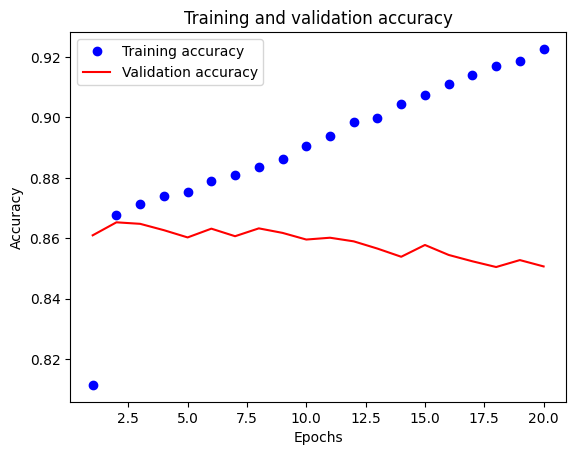

In [95]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(history_dict['accuracy']) + 1)
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

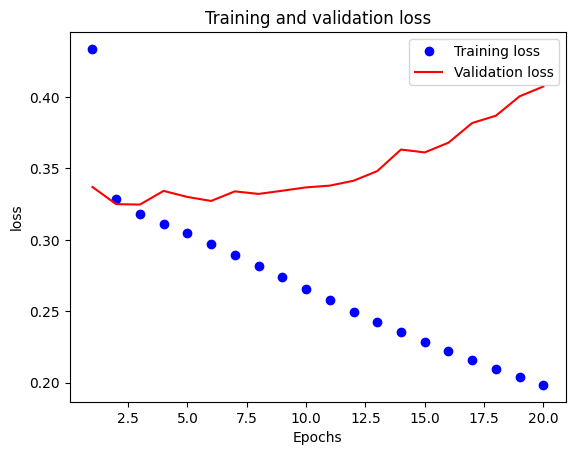

In [96]:
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(history_dict['accuracy']) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

**Clearly above model facing overfitting problem**

#For improving our result we take following steps :

1.   Increase the number of Neurons in our networks
2.   Regularization Method(L1 & L2)
3.   Droupout Method



In [101]:
#model with same number hidden layer but number of perception is large
from keras import models,layers

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(1000,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [102]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               512512    
                                                                 
 dense_13 (Dense)            (None, 512)               262656    
                                                                 
 dense_14 (Dense)            (None, 1)                 513       
                                                                 
Total params: 775681 (2.96 MB)
Trainable params: 775681 (2.96 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [103]:
model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [104]:
history = model.fit(X_train,
                    y_train,
                    epochs=20,
                    batch_size = 128,
                    validation_data=(X_test,y_test)
                    )

Epoch 1/20
313/313 [==============================] - 8s 25ms/step - loss: 0.3761 - accuracy: 0.8359 - val_loss: 0.3235 - val_accuracy: 0.8602
Epoch 2/20
313/313 [==============================] - 6s 18ms/step - loss: 0.2679 - accuracy: 0.8887 - val_loss: 0.3395 - val_accuracy: 0.8595
Epoch 3/20
313/313 [==============================] - 8s 24ms/step - loss: 0.1729 - accuracy: 0.9331 - val_loss: 0.3890 - val_accuracy: 0.8554
Epoch 4/20
313/313 [==============================] - 6s 18ms/step - loss: 0.0709 - accuracy: 0.9747 - val_loss: 0.5099 - val_accuracy: 0.8567
Epoch 5/20
313/313 [==============================] - 6s 21ms/step - loss: 0.0190 - accuracy: 0.9940 - val_loss: 0.7584 - val_accuracy: 0.8584
Epoch 6/20
313/313 [==============================] - 8s 26ms/step - loss: 0.0054 - accuracy: 0.9987 - val_loss: 0.8861 - val_accuracy: 0.8551
Epoch 7/20
313/313 [==============================] - 6s 21ms/step - loss: 7.6991e-04 - accuracy: 0.9999 - val_loss: 1.0602 - val_accuracy: 0.

In [105]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

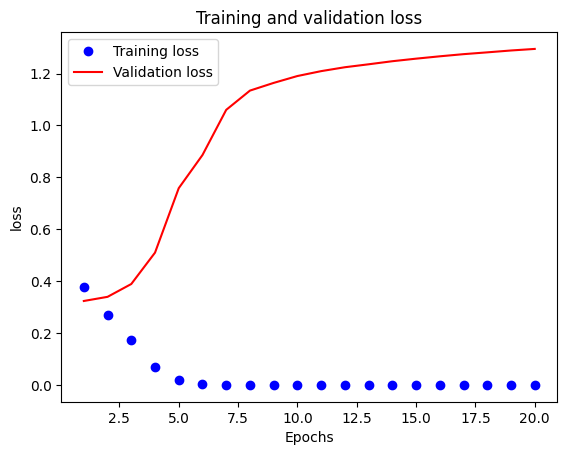

In [106]:
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(history_dict['accuracy']) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

**For increasing the number of percepton the model faccing overfitting problem.**

#Early stopping Method

In [118]:
#Early stopping
import keras
callbacks=keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=5,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [119]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(1000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [120]:
history = model.fit(X_train,
                    y_train,
                    epochs=20,
                    batch_size = 128,
                    validation_data=(X_test,y_test),
                    callbacks=[callbacks]
                    )

Epoch 1/20
313/313 [==============================] - 2s 4ms/step - loss: 0.4028 - accuracy: 0.8279 - val_loss: 0.3344 - val_accuracy: 0.8626
Epoch 2/20
313/313 [==============================] - 1s 3ms/step - loss: 0.3253 - accuracy: 0.8681 - val_loss: 0.3247 - val_accuracy: 0.8653
Epoch 3/20
313/313 [==============================] - 1s 4ms/step - loss: 0.3136 - accuracy: 0.8716 - val_loss: 0.3204 - val_accuracy: 0.8685
Epoch 4/20
313/313 [==============================] - 1s 4ms/step - loss: 0.3013 - accuracy: 0.8758 - val_loss: 0.3222 - val_accuracy: 0.8631
Epoch 5/20
313/313 [==============================] - 2s 5ms/step - loss: 0.2886 - accuracy: 0.8813 - val_loss: 0.3204 - val_accuracy: 0.8663
Epoch 6/20
313/313 [==============================] - 2s 6ms/step - loss: 0.2765 - accuracy: 0.8855 - val_loss: 0.3332 - val_accuracy: 0.8607
Epoch 7/20
313/313 [==============================] - 2s 5ms/step - loss: 0.2647 - accuracy: 0.8912 - val_loss: 0.3272 - val_accuracy: 0.8632
Epoch 

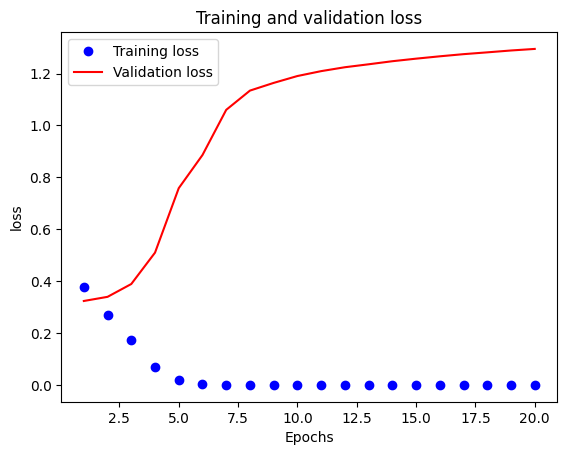

In [121]:
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(history_dict['accuracy']) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

#Regularization Method

In [135]:
from keras import regularizers
model = models.Sequential()
model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.01),
activation='relu', input_shape=(1000,)))
model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.01),
activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 64)                64064     
                                                                 
 dense_46 (Dense)            (None, 64)                4160      
                                                                 
 dense_47 (Dense)            (None, 1)                 65        
                                                                 
Total params: 68289 (266.75 KB)
Trainable params: 68289 (266.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [136]:
model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [137]:
history = model.fit(X_train,
                    y_train,
                    epochs=20,
                    batch_size = 128,
                    validation_data=(X_test,y_test)
                    )

Epoch 1/20
313/313 [==============================] - 3s 6ms/step - loss: 0.7607 - accuracy: 0.8336 - val_loss: 0.4791 - val_accuracy: 0.8505
Epoch 2/20
313/313 [==============================] - 1s 5ms/step - loss: 0.4407 - accuracy: 0.8547 - val_loss: 0.4200 - val_accuracy: 0.8521
Epoch 3/20
313/313 [==============================] - 2s 5ms/step - loss: 0.4099 - accuracy: 0.8551 - val_loss: 0.3913 - val_accuracy: 0.8608
Epoch 4/20
313/313 [==============================] - 1s 5ms/step - loss: 0.3918 - accuracy: 0.8593 - val_loss: 0.3795 - val_accuracy: 0.8624
Epoch 5/20
313/313 [==============================] - 2s 5ms/step - loss: 0.3808 - accuracy: 0.8622 - val_loss: 0.3783 - val_accuracy: 0.8563
Epoch 6/20
313/313 [==============================] - 2s 6ms/step - loss: 0.3731 - accuracy: 0.8630 - val_loss: 0.3730 - val_accuracy: 0.8573
Epoch 7/20
313/313 [==============================] - 2s 7ms/step - loss: 0.3645 - accuracy: 0.8644 - val_loss: 0.3898 - val_accuracy: 0.8474
Epoch 

In [139]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

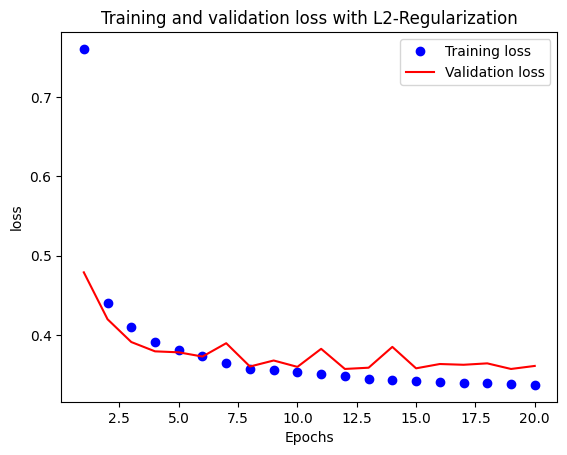

In [141]:
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(history_dict['accuracy']) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss with L2-Regularization')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

**For using L2 - Regularization we reduced the overfitting problem.**

In [157]:
#L1 regularization
from keras import models,layers
from keras import regularizers
model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.001),
activation='relu', input_shape=(1000,)))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.001),
activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

#compile the model
model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [158]:
history = model.fit(X_train,
                    y_train,
                    epochs=20,
                    batch_size = 128,
                    validation_data=(X_test,y_test)
                    )

Epoch 1/20
313/313 [==============================] - 2s 5ms/step - loss: 0.6638 - accuracy: 0.8289 - val_loss: 0.5018 - val_accuracy: 0.8560
Epoch 2/20
313/313 [==============================] - 1s 3ms/step - loss: 0.4774 - accuracy: 0.8584 - val_loss: 0.4857 - val_accuracy: 0.8483
Epoch 3/20
313/313 [==============================] - 1s 4ms/step - loss: 0.4524 - accuracy: 0.8609 - val_loss: 0.4622 - val_accuracy: 0.8512
Epoch 4/20
313/313 [==============================] - 1s 3ms/step - loss: 0.4376 - accuracy: 0.8602 - val_loss: 0.4230 - val_accuracy: 0.8612
Epoch 5/20
313/313 [==============================] - 1s 3ms/step - loss: 0.4223 - accuracy: 0.8634 - val_loss: 0.4153 - val_accuracy: 0.8629
Epoch 6/20
313/313 [==============================] - 1s 4ms/step - loss: 0.4117 - accuracy: 0.8629 - val_loss: 0.4204 - val_accuracy: 0.8570
Epoch 7/20
313/313 [==============================] - 1s 4ms/step - loss: 0.4051 - accuracy: 0.8633 - val_loss: 0.4100 - val_accuracy: 0.8606
Epoch 

In [159]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

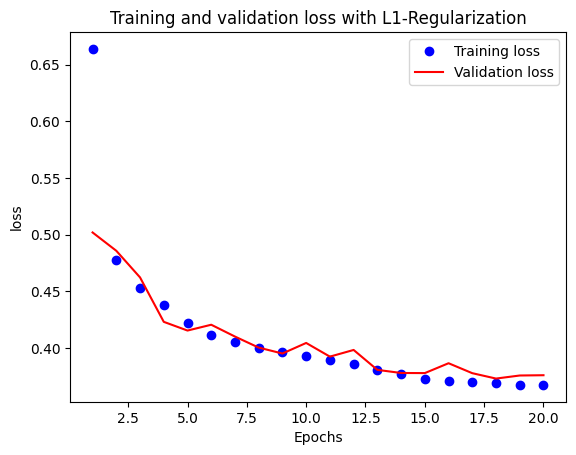

In [160]:
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(history_dict['accuracy']) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss with L1-Regularization')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [161]:
#Simultaneous L1 and L2 regularization
from keras import regularizers
model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
activation='relu', input_shape=(1000,)))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [162]:
model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [163]:
history = model.fit(X_train,
                    y_train,
                    epochs=20,
                    batch_size = 128,
                    validation_data=(X_test,y_test)
                    )

Epoch 1/20
313/313 [==============================] - 2s 4ms/step - loss: 0.6580 - accuracy: 0.8257 - val_loss: 0.4979 - val_accuracy: 0.8570
Epoch 2/20
313/313 [==============================] - 1s 3ms/step - loss: 0.4799 - accuracy: 0.8582 - val_loss: 0.4626 - val_accuracy: 0.8554
Epoch 3/20
313/313 [==============================] - 1s 4ms/step - loss: 0.4536 - accuracy: 0.8591 - val_loss: 0.4385 - val_accuracy: 0.8610
Epoch 4/20
313/313 [==============================] - 4s 12ms/step - loss: 0.4369 - accuracy: 0.8605 - val_loss: 0.4258 - val_accuracy: 0.8585
Epoch 5/20
313/313 [==============================] - 3s 9ms/step - loss: 0.4246 - accuracy: 0.8614 - val_loss: 0.4189 - val_accuracy: 0.8597
Epoch 6/20
313/313 [==============================] - 2s 7ms/step - loss: 0.4166 - accuracy: 0.8631 - val_loss: 0.4098 - val_accuracy: 0.8642
Epoch 7/20
313/313 [==============================] - 1s 4ms/step - loss: 0.4108 - accuracy: 0.8637 - val_loss: 0.4131 - val_accuracy: 0.8578
Epoch

In [164]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

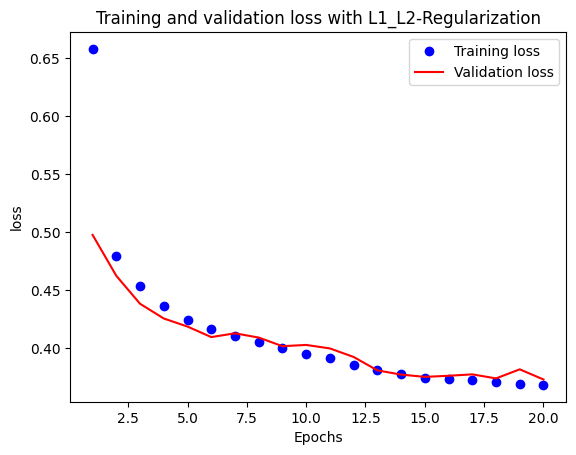

In [166]:
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(history_dict['accuracy']) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss with L1_L2-Regularization')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

#Dropout Method

In [175]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(1000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_81 (Dense)            (None, 512)               512512    
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 dense_82 (Dense)            (None, 512)               262656    
                                                                 
 dropout_7 (Dropout)         (None, 512)               0         
                                                                 
 dense_83 (Dense)            (None, 1)                 513       
                                                                 
Total params: 775681 (2.96 MB)
Trainable params: 775681 (2.96 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [176]:
model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [177]:
history = model.fit(X_train,
                    y_train,
                    epochs=20,
                    batch_size = 128,
                    validation_data=(X_test,y_test)
                    )

Epoch 1/20
313/313 [==============================] - 9s 25ms/step - loss: 0.4025 - accuracy: 0.8231 - val_loss: 0.3242 - val_accuracy: 0.8604
Epoch 2/20
313/313 [==============================] - 6s 18ms/step - loss: 0.3122 - accuracy: 0.8722 - val_loss: 0.3150 - val_accuracy: 0.8653
Epoch 3/20
313/313 [==============================] - 8s 24ms/step - loss: 0.2739 - accuracy: 0.8896 - val_loss: 0.3158 - val_accuracy: 0.8680
Epoch 4/20
313/313 [==============================] - 6s 19ms/step - loss: 0.2349 - accuracy: 0.9081 - val_loss: 0.3366 - val_accuracy: 0.8685
Epoch 5/20
313/313 [==============================] - 7s 24ms/step - loss: 0.1943 - accuracy: 0.9270 - val_loss: 0.3528 - val_accuracy: 0.8671
Epoch 6/20
313/313 [==============================] - 6s 19ms/step - loss: 0.1536 - accuracy: 0.9455 - val_loss: 0.3834 - val_accuracy: 0.8676
Epoch 7/20
313/313 [==============================] - 7s 23ms/step - loss: 0.1193 - accuracy: 0.9584 - val_loss: 0.4418 - val_accuracy: 0.8649

In [178]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

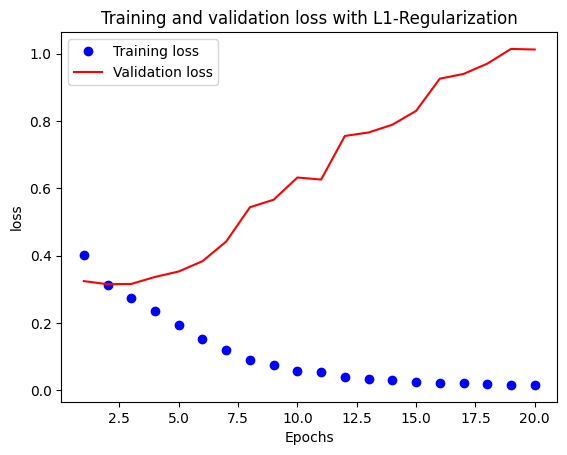

In [179]:
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(history_dict['accuracy']) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss with L1-Regularization')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

**For using Droupout method we facing overfitting problem**

#L1_L2 + Dropout Method

In [183]:
#Simultaneous L1 and L2 regularization
from keras import regularizers
model = models.Sequential()
model.add(layers.Dense(512, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
activation='relu', input_shape=(1000,)))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(512, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_87 (Dense)            (None, 512)               512512    
                                                                 
 dropout_10 (Dropout)        (None, 512)               0         
                                                                 
 dense_88 (Dense)            (None, 512)               262656    
                                                                 
 dropout_11 (Dropout)        (None, 512)               0         
                                                                 
 dense_89 (Dense)            (None, 1)                 513       
                                                                 
Total params: 775681 (2.96 MB)
Trainable params: 775681 (2.96 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [184]:
model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [185]:
history = model.fit(X_train,
                    y_train,
                    epochs=20,
                    batch_size = 128,
                    validation_data=(X_test,y_test)
                    )

Epoch 1/20
313/313 [==============================] - 11s 29ms/step - loss: 3.1143 - accuracy: 0.7904 - val_loss: 0.9221 - val_accuracy: 0.8425
Epoch 2/20
313/313 [==============================] - 9s 28ms/step - loss: 0.9143 - accuracy: 0.8350 - val_loss: 0.8665 - val_accuracy: 0.8545
Epoch 3/20
313/313 [==============================] - 7s 23ms/step - loss: 0.8915 - accuracy: 0.8392 - val_loss: 0.8429 - val_accuracy: 0.8597
Epoch 4/20
313/313 [==============================] - 9s 28ms/step - loss: 0.8798 - accuracy: 0.8425 - val_loss: 0.8492 - val_accuracy: 0.8544
Epoch 5/20
313/313 [==============================] - 8s 24ms/step - loss: 0.8748 - accuracy: 0.8428 - val_loss: 0.8400 - val_accuracy: 0.8521
Epoch 6/20
313/313 [==============================] - 8s 27ms/step - loss: 0.8724 - accuracy: 0.8425 - val_loss: 0.8295 - val_accuracy: 0.8595
Epoch 7/20
313/313 [==============================] - 8s 26ms/step - loss: 0.8703 - accuracy: 0.8409 - val_loss: 0.8382 - val_accuracy: 0.849

In [186]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

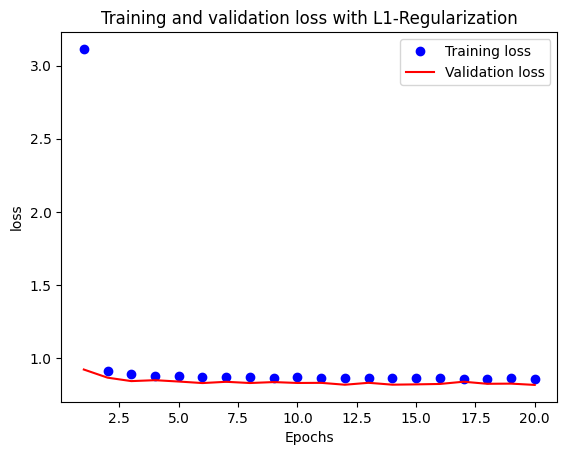

In [187]:
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(history_dict['accuracy']) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss with L1-Regularization')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

**So L1_L2 accuracy is most accuray among above all model.And accuracy is 86.49 % .**